# **import important libraries**

In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
%matplotlib inline

# **Data overview and preprocessing**

In [39]:
# load data
df=pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [41]:
df.shape

(569, 33)

In [42]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [43]:
# check the distribution of target variables
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [44]:
# convert y category to value, after encoding, benign is class 1 and malignant is class 0.
factor = pd.factorize(df['diagnosis'])
df.diagnosis = factor[0]
definitions = factor[1]
print(df.diagnosis.head())

0    0
1    0
2    0
3    0
4    0
Name: diagnosis, dtype: int64


<Axes: >

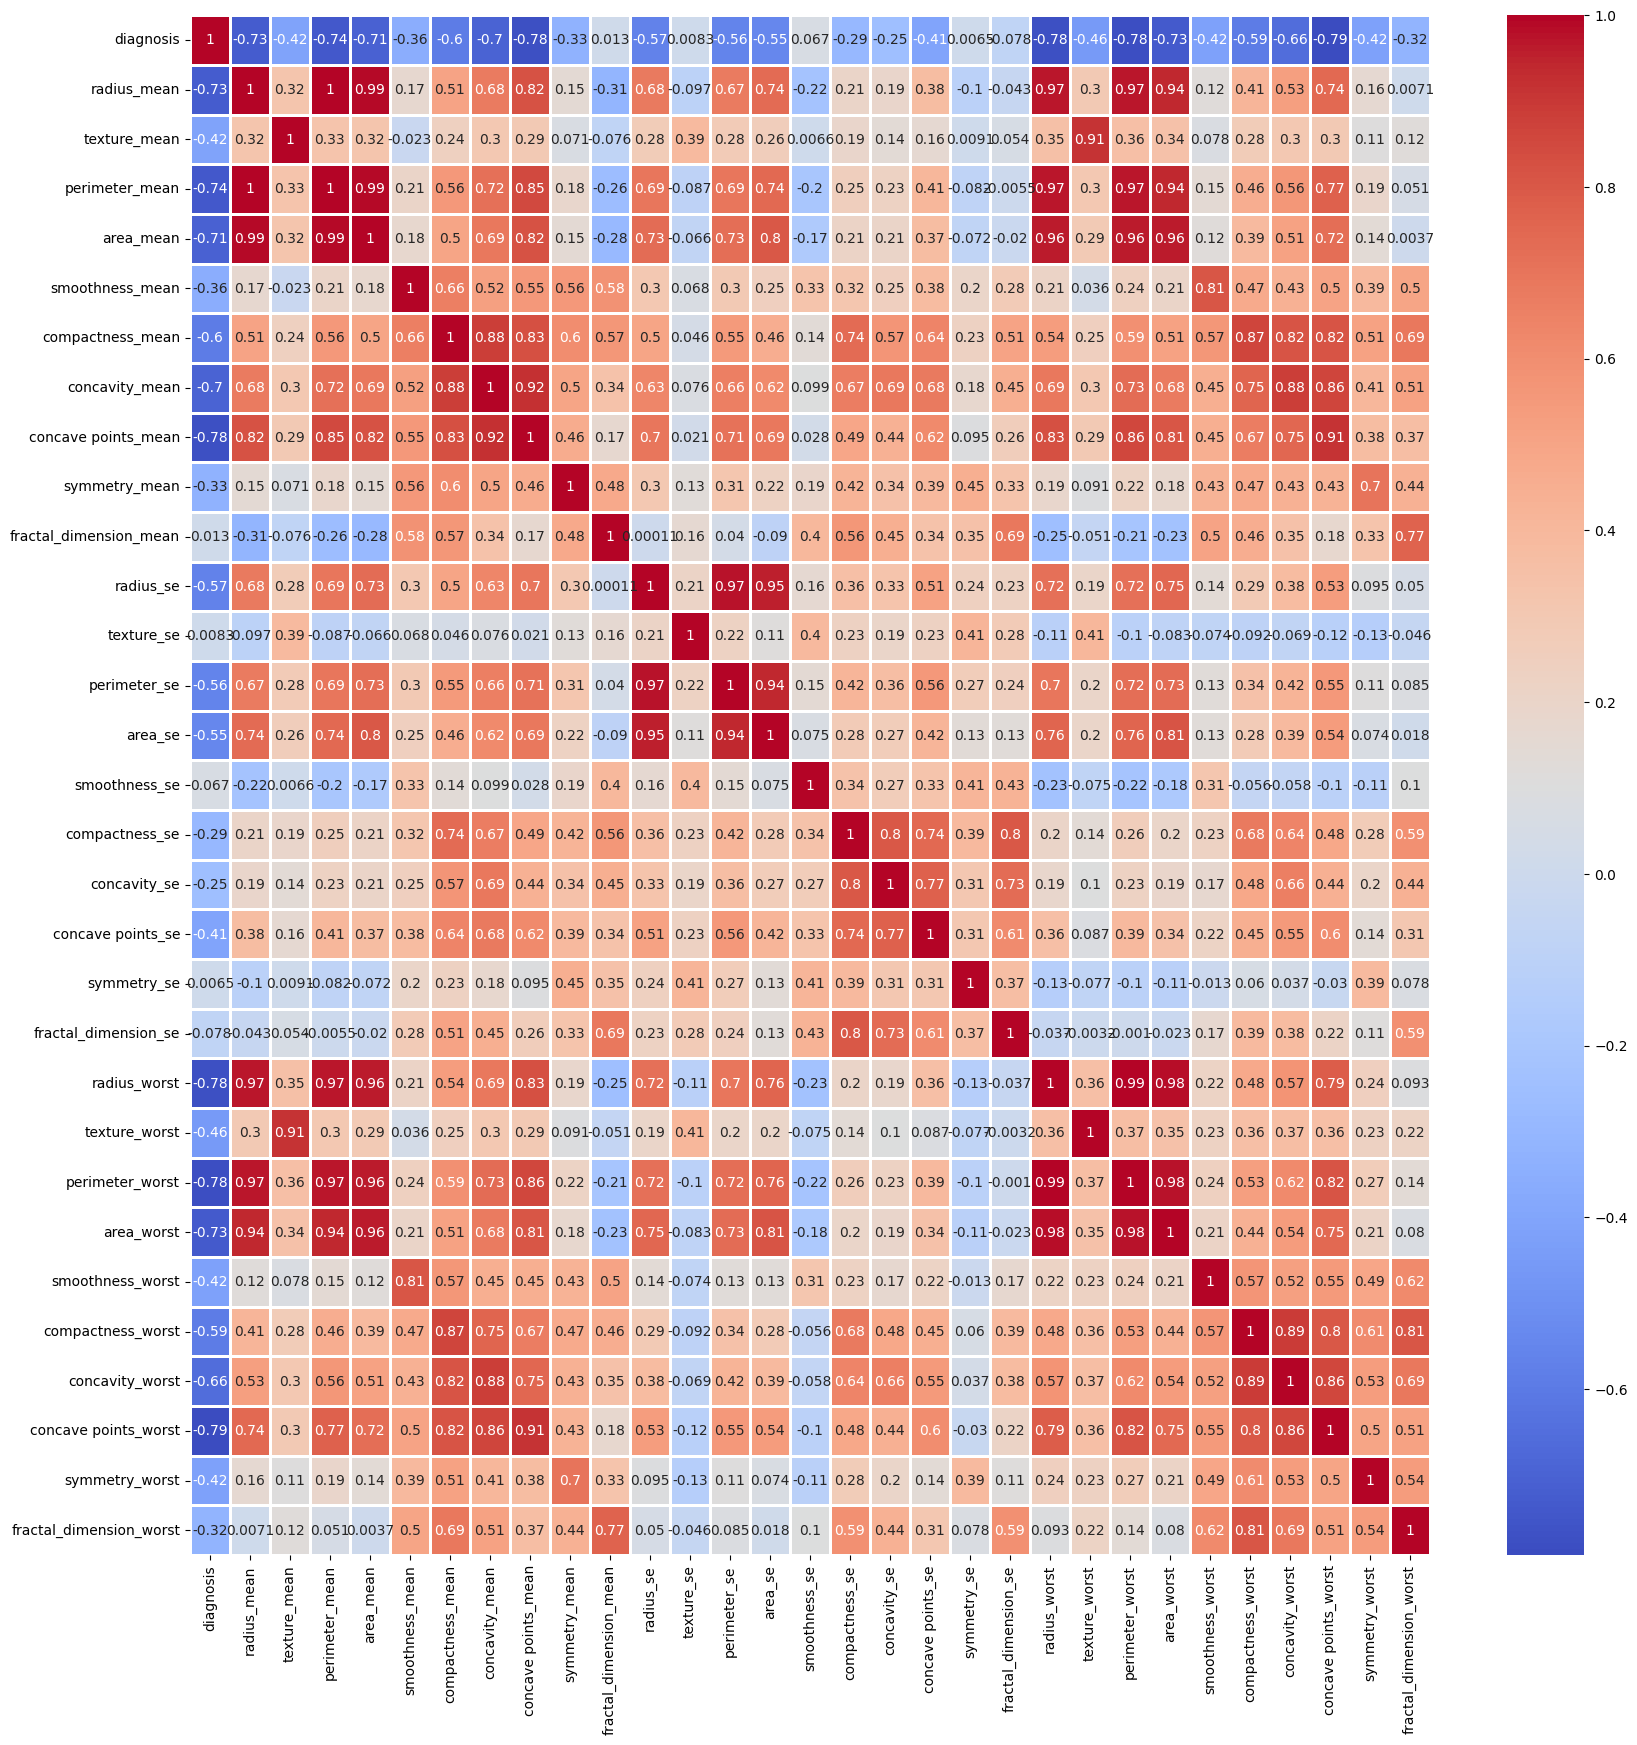

In [45]:
# Heatmap of Correlation matrix of breast cancer DataFrame
# create second DataFrame by droping 'id' and 'Unnamed: 32' columns since they don't provide meaningful information for the classification
cancer_df2 = df.drop(['id','Unnamed: 32'], axis = 1)
plt.figure(figsize=(20,20))
sns.heatmap(cancer_df2.corr() , annot = True, cmap ='coolwarm', linewidths=2)

In [46]:
# separating the independent variables and the label
X=df.iloc[:,2:-1]
y=df.iloc[:,1]

In [47]:
# Feature scaling
scaler=StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

# **Splitting data into training and test set**

In [48]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
print(X.shape, X_train.shape,X_test.shape)

(569, 30) (455, 30) (114, 30)


# **Supervised learning algorithms**

Support vector machine

In [49]:
# SVM
from sklearn import svm
model=svm.SVC(kernel='linear')
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print('ROC_AUC score for SVM is : ', roc_auc_score(y_test,y_pred))
print('Classification report for SVM:')
print(classification_report(y_test,y_pred))
print('confusion_matix for SVM is :')
print(confusion_matrix(y_test,y_pred))



ROC_AUC score for SVM is :  0.971260717688155
Classification report for SVM:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        47
           1       0.97      0.99      0.98        67

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

confusion_matix for SVM is :
[[45  2]
 [ 1 66]]


Logistic regression

In [50]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(random_state=0)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print('ROC_AUC score for LR is : ', roc_auc_score(y_test,y_pred))
print('Classification report for LR :')
print(classification_report(y_test,y_pred))
print('confusion_matix for LR is :')
print(confusion_matrix(y_test,y_pred))

ROC_AUC score for LR is :  0.9637980311209908
Classification report for LR :
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        47
           1       0.97      0.97      0.97        67

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

confusion_matix for LR is :
[[45  2]
 [ 2 65]]


K-Nearest Neighbor

In [51]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print('ROC_AUC score for KNN is : ', roc_auc_score(y_test,y_pred))
print('Classification report for KNN :')
print(classification_report(y_test,y_pred))
print('confusion_matix for KNN is :')
print(confusion_matrix(y_test,y_pred))

ROC_AUC score for KNN is :  0.9468085106382979
Classification report for KNN :
              precision    recall  f1-score   support

           0       1.00      0.89      0.94        47
           1       0.93      1.00      0.96        67

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

confusion_matix for KNN is :
[[42  5]
 [ 0 67]]


Naive Bayers Classifier

In [52]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print('ROC_AUC score for NB is : ', roc_auc_score(y_test,y_pred))
print('Classification report for NB :')
print(classification_report(y_test,y_pred))
print('confusion_matix for NB is :')
print(confusion_matrix(y_test,y_pred))

ROC_AUC score for NB is :  0.9020323912353128
Classification report for NB :
              precision    recall  f1-score   support

           0       0.88      0.89      0.88        47
           1       0.92      0.91      0.92        67

    accuracy                           0.90       114
   macro avg       0.90      0.90      0.90       114
weighted avg       0.90      0.90      0.90       114

confusion_matix for NB is :
[[42  5]
 [ 6 61]]


Decision tree

In [53]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion='entropy',random_state=0,max_depth=3,min_samples_leaf=5)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print('ROC_AUC score for DT is : ', roc_auc_score(y_test,y_pred))
print('Classification report for DT :')
print(classification_report(y_test,y_pred))
print('confusion_matix for DT is :')
print(confusion_matrix(y_test,y_pred))


ROC_AUC score for DT is :  0.9520482692918387
Classification report for DT :
              precision    recall  f1-score   support

           0       0.90      0.98      0.94        47
           1       0.98      0.93      0.95        67

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114

confusion_matix for DT is :
[[46  1]
 [ 5 62]]


Random Forest

In [84]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', random_state = 0)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
print('ROC_AUC score for RF is : ', roc_auc_score(y_test,y_pred))
print('Classification report for RF :')
print(classification_report(y_test,y_pred))
print('confusion_matix for RF is :')
print(confusion_matrix(y_test,y_pred))


ROC_AUC score for RF is :  0.9563353445538267
Classification report for RF :
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        47
           1       0.97      0.96      0.96        67

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

confusion_matix for RF is :
[[45  2]
 [ 3 64]]


Adaboost Classifier

In [80]:
# Adaboost classifier
from sklearn.ensemble import AdaBoostClassifier
model=DecisionTreeClassifier(criterion='entropy',max_depth=1)
AdaBoost=AdaBoostClassifier(estimator=model,n_estimators=2000,learning_rate=0.1)
boostmodel =AdaBoost.fit(X_train,y_train)
y_pred=boostmodel.predict(X_test)
print('ROC_AUC score for Adaboost is : ', roc_auc_score(y_test,y_pred))
print('Classification report for Adaboost:')
print(classification_report(y_test,y_pred))
print('confusion_matix for Adaboost is :')
print(confusion_matrix(y_test,y_pred))

ROC_AUC score for Adaboost is :  0.9818990155604954
Classification report for Adaboost:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        47
           1       0.99      0.99      0.99        67

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

confusion_matix for Adaboost is :
[[46  1]
 [ 1 66]]


XGBoost classifier

In [81]:
# XGboost classifier
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print('ROC_AUC score for XGBoost is : ', roc_auc_score(y_test,y_pred))
print('Classification report for XGBoost  :')
print(classification_report(y_test,y_pred))
print('confusion_matix for XGBoost is :')
print(confusion_matrix(y_test,y_pred))

ROC_AUC score for XGBoost is :  0.9787234042553192
Classification report for XGBoost  :
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        47
           1       0.97      1.00      0.99        67

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

confusion_matix for XGBoost is :
[[45  2]
 [ 0 67]]


XGBoost tuning

In [73]:
# XGBoost parameter tuning randomized search
# XGBoost classifier most required parameters

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.50, 0.75,1.0 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7,1 ]
}
# Randomized Search
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(model, param_distributions=params, scoring= 'roc_auc', n_jobs= -1, verbose= 3)
random_search.fit(X_train, y_train)
print(random_search.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'min_child_weight': 1, 'max_depth': 10, 'learning_rate': 0.3, 'gamma': 0.0, 'colsample_bytree': 0.5}


In [74]:
# training XGBoost with best parameters
xgb_classifier_optimized = XGBClassifier( colsample_bytree=0.5, gamma=0.0,
       learning_rate=0.3, max_depth=10,
       min_child_weight=1, )

xgb_classifier_optimized.fit(X_train, y_train)
y_pred=xgb_classifier_optimized.predict(X_test)
print('ROC_AUC score for XGBoost optimized is : ', roc_auc_score(y_test,y_pred))
print('Classification report for XGBoost optimized  :')
print(classification_report(y_test,y_pred))
print('confusion_matix for XGBoost optimized is :')
print(confusion_matrix(y_test,y_pred))

ROC_AUC score for XGBoost optimized is :  0.9818990155604954
Classification report for XGBoost optimized  :
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        47
           1       0.99      0.99      0.99        67

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

confusion_matix for XGBoost optimized is :
[[46  1]
 [ 1 66]]


# **Save the model**

In [83]:
## Pickle
import pickle

# save model
pickle.dump(boostmodel, open('breast_cancer_detector.pickle', 'wb'))

# load model
breast_cancer_detector_model = pickle.load(open('breast_cancer_detector.pickle', 'rb'))

# predict the output
y_pred = breast_cancer_detector_model.predict(X_test)

# confusion matrix
print('Confusion matrix of AdaBoost model: \n',confusion_matrix(y_test, y_pred),'\n')

# show the ROC_AUC score
print('ROC_AUC score of AdaBoost model = ',roc_auc_score(y_test, y_pred))

# Classification report
print('classification_report for Adaboost is :')
print(classification_report(y_test,y_pred))


Confusion matrix of AdaBoost model: 
 [[46  1]
 [ 1 66]] 

ROC_AUC score of AdaBoost model =  0.9818990155604954
classification_report for Adaboost is :
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        47
           1       0.99      0.99      0.99        67

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



# **Conclusion**

To get better performance, we trained all supervised classification algorithms but you can try out a few of them which are always popular. After training all algorithms, we evaluated them based on confusion matrix,  sensitivity, precision, f1-score,ROC-AUC score to identify the best machine learning
algorithm.

we found that AdaBoost and XGBoost classifiers outperform all other algorithms and we have chosen AdaBoost.


